In [1]:
import pandas
import requests
%matplotlib inline
from matplotlib.pyplot import figure
from seaborn import lineplot, barplot, color_palette, set_palette

In [2]:
from bs4 import BeautifulSoup

def extract_table_rows(url):
    from bs4 import BeautifulSoup
    html = BeautifulSoup(requests.get(url).text, 'lxml')
    return html.find_all('tr')

url = 'https://h1bdata.info/index.php?em=&job=&city=DALLAS&year=All+Years'
rows = extract_table_rows(url)

print(f"The table for Dallas (`dal.htm`) has {len(rows)} rows, including the header.")
print(f"The returned object, `rows`, has type `{type(rows)}`.")

The table for Dallas (`dal.htm`) has 42198 rows, including the header.
The returned object, `rows`, has type `<class 'bs4.element.ResultSet'>`.


In [3]:
def inspect_html_table_row(rows, frontmatter=None):
    if frontmatter is not None:
        print(frontmatter)
    cols = rows
    for col_num, col in enumerate(cols):
        print("[{}] '{}'".format(col_num, col.text))
        print("  - Type: {}".format(type(col)))
        print("  - Raw HTML: '{}'".format(str(col)))

header = rows[0]
print("=== HEADER ===\n")
inspect_html_table_row(header) 

=== HEADER ===

[0] 'EMPLOYER'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th>EMPLOYER</th>'
[1] 'JOB TITLE'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th>JOB TITLE</th>'
[2] 'BASE SALARY'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th>BASE SALARY</th>'
[3] 'LOCATION'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th>LOCATION</th>'
[4] 'SUBMIT DATE'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th data-date-format="mm/dd/yy">SUBMIT DATE</th>'
[5] 'START DATE'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th data-date-format="mm/dd/yy">START DATE</th>'
[6] 'CASE STATUS'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th>CASE STATUS</th>'


In [4]:
first_data_row = rows[1]
inspect_html_table_row(first_data_row, frontmatter="=== FIRST DATA ROW (`rows[1]`) ===\n")

=== FIRST DATA ROW (`rows[1]`) ===

[0] 'ADEPTMAX CORPORATION'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td><a href="index.php?em=ADEPTMAX+CORPORATION&amp;job=&amp;city=DALLAS&amp;year=ALL+YEARS">ADEPTMAX CORPORATION</a></td>'
[1] ''
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td><a href="index.php?em=&amp;job=&amp;city=DALLAS&amp;year=ALL+YEARS"></a></td>'
[2] '60,000'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>60,000</td>'
[3] 'DALLAS, TX'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td><a href="index.php?em=&amp;job=&amp;city=DALLAS&amp;year=ALL+YEARS">DALLAS, TX</a></td>'
[4] '02/27/2015'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>02/27/2015</td>'
[5] '03/09/2015'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>03/09/2015</td>'
[6] 'CERTIFIED'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>CERTIFIED</td>'


In [5]:
last_data_row = rows[-1]
inspect_html_table_row(last_data_row, frontmatter="=== LAST DATA ROW (`rows[-1]`) ===\n")

=== LAST DATA ROW (`rows[-1]`) ===

[0] 'IBM CORPORATION'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td><a href="index.php?em=IBM+CORPORATION&amp;job=&amp;city=DALLAS&amp;year=ALL+YEARS">IBM CORPORATION</a></td>'
[1] 'Z CLOUD MIGRATION CONSULTANT'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td><a href="index.php?em=&amp;job=Z+CLOUD+MIGRATION+CONSULTANT&amp;city=DALLAS&amp;year=ALL+YEARS">Z CLOUD MIGRATION CONSULTANT</a></td>'
[2] '95,285'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>95,285</td>'
[3] 'DALLAS, TX'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td><a href="index.php?em=&amp;job=&amp;city=DALLAS&amp;year=ALL+YEARS">DALLAS, TX</a></td>'
[4] '03/20/2020'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>03/20/2020</td>'
[5] '09/10/2020'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>09/10/2020</td>'
[6] 'CERTIFIED'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>CERTIFIED</td>'


In [6]:
def raw_rows_to_pandas(rows):
    from pandas import DataFrame
    
    df_rows = []
    for row in rows:
        cols = list(row)
        if cols[6].text == 'CERTIFIED':
            df_rows.append([cols[0].text # EMPLOYER
                            , cols[1].text # JOB TITLE
                            , cols[3].text # LOCATION
                            , int(cols[2].text.replace(',', '')) # BASE SALARY
                            , int(cols[4].text[-4:]) #  START YEAR
                           ])
    
    return DataFrame(df_rows,
                     columns=['EMPLOYER', 'JOB TITLE', 'LOCATION', 'BASE SALARY', 'YEAR'])


dal = raw_rows_to_pandas(rows[1:])
print("Found", len(dal), "rows")
dal.sample(5)

Found 39966 rows


,EMPLOYER,JOB TITLE,LOCATION,BASE SALARY,YEAR
1238,PRICEWATERHOUSECOOPERS ADVISORY SERVICES LLC,ADVISORY MANAGER,"DALLAS, TX",147000,2015
6325,ALIXPARTNERS LLP,BUSINESS INTELLIGENCE CENTER ANALYST,"DALLAS, TX",58000,2019
34619,PRUDENT TECHNOLOGIES & CONSULTING INC,SPLUNK ENGINEER,"DALLAS, TX",120000,2020
10711,AVANT SYSTEMS INC,DATABASE ADMINISTRATOR,"DALLAS, TX",47000,2015
24241,NOKIA OF AMERICA CORPORATION,SAP BASIS ARCHITECT,"DALLAS, TX",150000,2020


In [7]:
dal = dal[dal['JOB TITLE'].str.contains('.*DATA.*')]

In [8]:
dal_job_titles = dal['JOB TITLE'].unique()
print(f"There are {len(dal_job_titles)} unique job titles in the Dallas dataset.")
print(f"They are:\n{dal_job_titles[:20]}...")

There are 322 unique job titles in the Dallas dataset.
They are:
['ADVANCED DATA ANALYST' 'ANALYST, DATA INTELLIGENCE'
 'ANALYTICS DATA SCIENCE' 'APPLICATION DATABASE ADMINISTRATOR'
 'APPLICATION DATABASE ADMINISTRATOR - ORACLE DATABASE'
 'APPLICATION DEVELOPER - DATA MANAGEMENT' 'ASSOCIATE DATA ANALYST'
 'ASSOCIATE DATA PLATFORM ENGINEER'
 'ASSOCIATE, DATABASE MANAGEMENT ANALYST' 'AVP DATA SCIENCE'
 'AVP, DATA DEVELOPMENT' 'BI DATA ANALYST'
 'BI, DATA, & ANALYTICS ARCHITECT' 'BIG DATA ANALYST' 'BIG DATA ARCHITECT'
 'BIG DATA ARCHITECT AND APPLICATIONS DEVELOPMENT MANAGER'
 'BIG DATA CONSULTANT' 'BIG DATA DEVELOPER' 'BIG DATA ENGINEER'
 'BIG DATA HADOOP DEVELOPER']...


In [9]:
def subset_series_str(s, pattern):
    from pandas import Series
    if not isinstance(s, Series):
        s = Series(s) 
    return s[s.str.contains(pattern)]

In [10]:
jobs_with_data_followed_by_scientist = subset_series_str(dal_job_titles, r'.*DATA.*SCIENTIST.*')
jobs_with_data_followed_by_scientist

33                           COMPUTER DATA SCIENTIST
41                       DATA ANALYST DATA SCIENTIST
52                       DATA ANALYTICS SCIENTIST II
90                                    DATA SCIENTIST
91                       DATA SCIENTIST  WEB ANALYST
92                     DATA SCIENTIST - INTERMEDIATE
93                         DATA SCIENTIST - MODELING
94                               DATA SCIENTIST BAL#
95     DATA SCIENTIST BUSINESS INTELLIGENCE ANALYSTS
96                                  DATA SCIENTIST I
97                                 DATA SCIENTIST II
98                                DATA SCIENTIST III
99                               DATA SCIENTIST, FTE
175                         FINANCIAL DATA SCIENTIST
191                            JUNIOR DATA SCIENTIST
195                              LEAD DATA SCIENTIST
219                 PRINCIPAL  SENIOR DATA SCIENTIST
240               SENIOR CONSULTANT - DATA SCIENTIST
248                            SENIOR DATA SCI

In [11]:
def filter_jobs(df, target_jobs):
    from pandas import DataFrame
    assert isinstance(df, DataFrame)
    assert df.columns.contains('JOB TITLE')
    assert all([isinstance(j, str) for j in target_jobs])
    keep_job = df['JOB TITLE'].str.contains('|'.join(target_jobs))
    return df[keep_job]   
    
    
target_job_list = ['DATA ANALYST', 'DATABASE ADMINISTRATOR', 'DATA SCIENTIST', 'DATA ENGINEER']
dal_target_jobs = filter_jobs(dal, target_job_list)
print(dal_target_jobs['JOB TITLE'].unique())

['ADVANCED DATA ANALYST' 'APPLICATION DATABASE ADMINISTRATOR'
 'APPLICATION DATABASE ADMINISTRATOR - ORACLE DATABASE'
 'ASSOCIATE DATA ANALYST' 'BI DATA ANALYST' 'BIG DATA ANALYST'
 'BIG DATA ENGINEER' 'BIGDATA ENGINEER'
 'BL SQL DEVELOPER DATABASE ADMINISTRATOR' 'BUSINESS DATA ANALYST'
 'BUSINESS DATA ANALYST NET DEVELOPER'
 'BUSINESS INTELLIGENCE DEVELOPER DATABASE ADMINISTRATOR'
 'CC&B AND ORACLE DATABASE ADMINISTRATOR' 'COMPLIANCE DATA ANALYST'
 'COMPLIANCE DATA ANALYST III' 'COMPUTER DATA ANALYST'
 'COMPUTER DATA SCIENTIST' 'CREDIT DATA ANALYST' 'DATA ANALYST'
 'DATA ANALYST 2' 'DATA ANALYST 3' 'DATA ANALYST 4'
 'DATA ANALYST DATA SCIENTIST' 'DATA ANALYST EXPERT ENGINEER'
 'DATA ANALYST II' 'DATA ANALYST III' 'DATA ANALYST NETZZA DEVELOPER'
 'DATA ANALYST SR II' 'DATA ANALYST W SAS'
 'DATA ANALYST, MASTER DATA MANAGEMENT' 'DATA ENGINEER'
 'DATA ENGINEER CONSULTANT' 'DATA ENGINEER DATABASE ARCHITECTS'
 'DATA ENGINEER I' 'DATA ENGINEER II' 'DATA ENGINEER III'
 'DATA ENGINEERING CONS

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The 'contains' method is deprecated and will be removed in a future version. Use 'key in index' instead of 'index.contains(key)'
  after removing the cwd from sys.path.


In [12]:
def normalize_series(s, target):
    from pandas import Series
    assert isinstance(s, Series), f"Object `s` has type `{type(s)}`, not `Series`."
    assert isinstance(target, str), f"`target` is a `{type(target)}`, not a string."
    return s.str.replace('.*' + target + '.*', target)


In [13]:
TARGET_JOBS = ['DATA SCIENTIST', 'DATA ANALYST', 'DATA ENGINEER', 'DATABASE ADMINISTRATOR']

def reduce_jobs(df, target_jobs=TARGET_JOBS):
    df_reduced = df.copy()
    for title in target_jobs:
        df_reduced['JOB TITLE'] = normalize_series(df_reduced['JOB TITLE'], title)
    return df_reduced

dal_reduced = reduce_jobs(dal)
dal_reduced.sample(20)

,EMPLOYER,JOB TITLE,LOCATION,BASE SALARY,YEAR
15335,ALLIANZ GLOBAL INVESTORS US HOLDINGS LLC,IT DEVELOPER DATA SOLUTIONS,"DALLAS, TX",150000,2019
10843,HITACHI CONSULTING CORPORATION,DATABASE ADMINISTRATOR,"DALLAS, TX",74776,2018
10465,COPART INC,DATA ENGINEER,"DALLAS, TX",67891,2017
10633,KINTRANS INC,DATA SCIENTIST,"DALLAS, TX",80000,2020
10806,IBM INDIA PRIVATE LIMITED,DATABASE ADMINISTRATOR,"DALLAS, TX",67891,2017
18469,IBM INDIA PRIVATE LIMITED,DATABASE ADMINISTRATOR,"DALLAS, TX",81837,2016
10323,VOTO CONSULTING,DATA ANALYST,"DALLAS, TX",60620,2019
34888,SOUTHWEST AIRLINES CO,DATABASE ADMINISTRATOR,"DALLAS, TX",112600,2019
5513,PIONEER CONSULTING SERVICES LLC,BIG DATA DEVELOPER,"DALLAS, TX",100000,2016
13874,IQR CONSULTING INC,DATA ANALYST,"DALLAS, TX",78000,2015


In [14]:
dal_reduced_job_counts = dal_reduced['JOB TITLE'].value_counts()
dal_reduced_job_counts.head(10)

DATABASE ADMINISTRATOR        404
DATA ANALYST                  175
DATA SCIENTIST                 99
DATA ENGINEER                  75
DATABASE DEVELOPER             27
DATA ARCHITECT                 19
DATABASE ANALYST               15
DATA SPECIALIST                14
DATABASE ENGINEER              12
DATA WAREHOUSING DEVELOPER      8
Name: JOB TITLE, dtype: int64

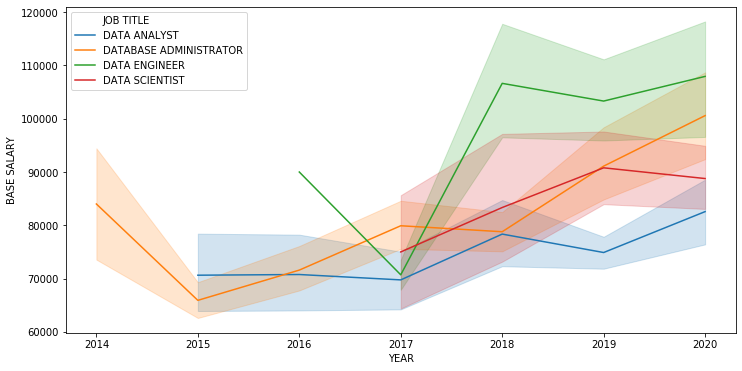

In [15]:
# Base salaries change over time
dal_reduced2 = dal_reduced.loc[dal_reduced['JOB TITLE'].isin(TARGET_JOBS)]

fig = figure(figsize=(12, 6))
lineplot(x='YEAR', y='BASE SALARY', hue='JOB TITLE', data=dal_reduced2)
set_palette(color_palette('colorblind'))

In [16]:
def get_median_salaries_by_title(df):
    from pandas import DataFrame
    assert isinstance(df, DataFrame)
    df_return = df[['JOB TITLE', 'BASE SALARY']].groupby('JOB TITLE').median().reset_index()
    df_return['BASE SALARY'] = df_return['BASE SALARY'].astype(int)
    return df_return
    
get_median_salaries_by_title(dal_reduced2)

,JOB TITLE,BASE SALARY
0,DATA ANALYST,76150
1,DATA ENGINEER,102000
2,DATA SCIENTIST,81806
3,DATABASE ADMINISTRATOR,75000


In [17]:
CITY_NAMES = {'nyc': 'NEW YORK',
              'sfo': 'SAN FRANCISCO',
              'hou': 'HOUSTON',
              'aus': 'AUSTIN',
              'dal': 'DALLAS'}

df_list = []
for city_code, city_name in CITY_NAMES.items():
    url = f'https://h1bdata.info/index.php?em=&job=&city={city_name}&year=All+Years'
    df_city = filter_jobs(reduce_jobs(raw_rows_to_pandas(extract_table_rows(url)[1:])), TARGET_JOBS)
    df_city['LOCATION'] = city_name
    df_list.append(df_city)
df_all = pandas.concat(df_list)
df_summary = df_all[['JOB TITLE', 'LOCATION', 'BASE SALARY']] \
             .groupby(['JOB TITLE', 'LOCATION']) \
             .median() \
             .reset_index()
df_summary['BASE SALARY'] = df_summary['BASE SALARY'].astype(int)


display(df_summary)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The 'contains' method is deprecated and will be removed in a future version. Use 'key in index' instead of 'index.contains(key)'
  after removing the cwd from sys.path.


,JOB TITLE,LOCATION,BASE SALARY
0,DATA ANALYST,AUSTIN,75920
1,DATA ANALYST,DALLAS,76150
2,DATA ANALYST,HOUSTON,74600
3,DATA ANALYST,NEW YORK,84256
4,DATA ANALYST,SAN FRANCISCO,100000
5,DATA ENGINEER,AUSTIN,113000
6,DATA ENGINEER,DALLAS,102000
7,DATA ENGINEER,HOUSTON,93612
8,DATA ENGINEER,NEW YORK,97500
9,DATA ENGINEER,SAN FRANCISCO,125000


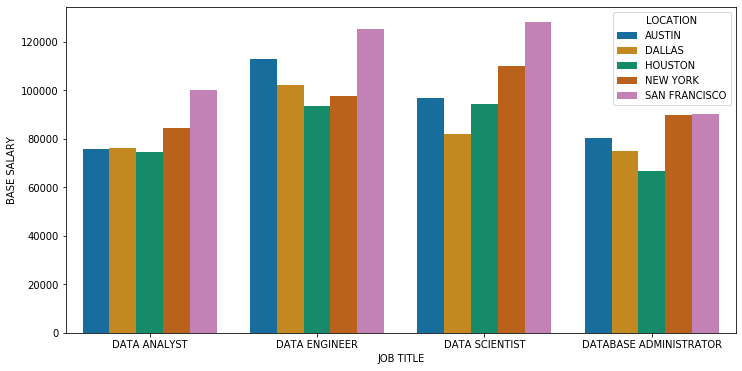

In [18]:
# Median base salaries compared across 5 cities
figure(figsize=(12, 6))
g = barplot(x='JOB TITLE', y='BASE SALARY', hue='LOCATION', data=df_summary)
set_palette(color_palette('colorblind'))